# Diabetic Retinopathy Code
## ravirajchaurasiya111@gmail.com

In [2]:
import numpy as np # mathematical operation
import pandas as pd #to open dataset file
from sklearn.tree import export_graphviz   #all machine algorithm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import tree
from matplotlib import pyplot
from sklearn.externals.six import StringIO  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor #continuos values to make a new algo from many subsequent algorithms
from sklearn.ensemble import RandomForestClassifier #according to the categories
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [8]:
messidor_data = pd.read_csv( 'messidor_features.arff.txt', sep= ',',header=None,comment='@')

In [4]:
# Describe columns with numerical values
pd.set_option('precision', 3)
messidor_data.describe()

0         1         2         3         4         5         6   \
count  1151.000  1151.000  1151.000  1151.000  1151.000  1151.000  1151.000   
mean      0.997     0.918    38.428    36.910    35.141    32.297    28.747   
std       0.059     0.274    25.621    24.106    22.805    21.115    19.509   
min       0.000     0.000     1.000     1.000     1.000     1.000     1.000   
25%       1.000     1.000    16.000    16.000    15.000    14.000    11.000   
50%       1.000     1.000    35.000    35.000    32.000    29.000    25.000   
75%       1.000     1.000    55.000    53.000    51.000    48.000    43.000   
max       1.000     1.000   151.000   132.000   120.000   105.000    97.000   

             7         8         9         10        11        12        13  \
count  1151.000  1151.000  1151.000  1151.000  1151.000  1151.000  1151.000   
mean     21.151    64.097    23.088     8.705     1.836     0.561     0.212   
std      15.102    58.485    21.603    11.568     3.923     2.484     1.057   
min       1.000     0.349     0.000     0.000     0.000     0.000     0.000   
25%       8.000    22.272     7.939     1.249     0.082     0.000     0.000   
50%      18.000    44.249    17.038     4.423     0.485     0.022     0.002   
75%      32.000    87.804    31.306    11.767     1.922     0.192     0.038   
max      89.000   403.939   167.131   106.070    59.766    51.423    20.099   

             14        15        16        17        18        19  
count  1151.000  1151.000  1151.000  1151.000  1151.000  1151.000  
mean      0.086     0.037     0.523     0.108     0.336     0.531  
std       0.399     0.179     0.028     0.018     0.473     0.499  
min       0.000     0.000     0.368     0.058     0.000     0.000  
25%       0.000     0.000     0.503     0.096     0.000     0.000  
50%       0.000     0.000     0.523     0.107     0.000     1.000  
75%       0.005     0.004     0.544     0.120     1.000     1.000  
max       5.938     3.087     0.592     0.219     1.000     1.000

In [7]:
# correlation matrix
messidor_data.corr(method='pearson')

0      1          2      3          4      5      6      7      8   \
0   1.000 -0.018  3.558e-02  0.036  3.339e-02  0.037  0.035  0.032  0.064   
1  -0.018  1.000  5.330e-02  0.055  5.306e-02  0.059  0.061  0.060  0.063   
2   0.036  0.053  1.000e+00  0.996  9.857e-01  0.963  0.925  0.860 -0.230   
3   0.036  0.055  9.962e-01  1.000  9.942e-01  0.977  0.945  0.884 -0.245   
4   0.033  0.053  9.857e-01  0.994  1.000e+00  0.992  0.969  0.916 -0.283   
5   0.037  0.059  9.631e-01  0.977  9.918e-01  1.000  0.988  0.948 -0.310   
6   0.035  0.061  9.253e-01  0.945  9.687e-01  0.988  1.000  0.975 -0.350   
7   0.032  0.060  8.596e-01  0.884  9.162e-01  0.948  0.975  1.000 -0.376   
8   0.064  0.063 -2.297e-01 -0.245 -2.832e-01 -0.310 -0.350 -0.376  1.000   
9   0.063  0.052 -1.030e-01 -0.115 -1.391e-01 -0.160 -0.197 -0.224  0.767   
10  0.044  0.054 -4.465e-02 -0.058 -8.660e-02 -0.110 -0.153 -0.181  0.763   
11  0.028  0.042  1.030e-01  0.086  5.777e-02  0.030 -0.020 -0.058  0.487   
12  0.013  0.016  1.345e-01  0.118  9.451e-02  0.067  0.022 -0.012  0.164   
13  0.012  0.019  1.429e-01  0.124  9.886e-02  0.070  0.025 -0.012  0.132   
14  0.013  0.023  1.965e-01  0.173  1.408e-01  0.103  0.051  0.007  0.115   
15  0.012  0.024  2.084e-01  0.186  1.564e-01  0.119  0.071  0.032  0.085   
16 -0.022  0.005  1.253e-06  0.002  3.868e-04  0.002 -0.002 -0.003 -0.086   
17 -0.067 -0.080  3.399e-02  0.035  3.040e-02  0.017  0.011 -0.012 -0.086   
18 -0.052  0.011 -3.443e-01 -0.361 -3.894e-01 -0.412 -0.437 -0.435  0.390   
19  0.063 -0.077  2.926e-01  0.266  2.347e-01  0.198  0.162  0.128  0.058   

           9      10     11     12     13     14     15         16     17  \
0   6.306e-02  0.044  0.028  0.013  0.012  0.013  0.012 -2.194e-02 -0.067   
1   5.245e-02  0.054  0.042  0.016  0.019  0.023  0.024  4.751e-03 -0.080   
2  -1.030e-01 -0.045  0.103  0.134  0.143  0.197  0.208  1.253e-06  0.034   
3  -1.153e-01 -0.058  0.086  0.118  0.124  0.173  0.186  1.953e-03  0.035   
4  -1.391e-01 -0.087  0.058  0.095  0.099  0.141  0.156  3.868e-04  0.030   
5  -1.600e-01 -0.110  0.030  0.067  0.070  0.103  0.119  1.520e-03  0.017   
6  -1.973e-01 -0.153 -0.020  0.022  0.025  0.051  0.071 -1.725e-03  0.011   
7  -2.237e-01 -0.181 -0.058 -0.012 -0.012  0.007  0.032 -2.557e-03 -0.012   
8   7.671e-01  0.763  0.487  0.164  0.132  0.115  0.085 -8.615e-02 -0.086   
9   1.000e+00  0.920  0.625  0.257  0.216  0.181  0.139 -1.290e-01 -0.091   
10  9.196e-01  1.000  0.781  0.384  0.329  0.274  0.214 -1.280e-01 -0.099   
11  6.245e-01  0.781  1.000  0.826  0.758  0.637  0.519 -1.680e-01 -0.091   
12  2.572e-01  0.384  0.826  1.000  0.932  0.772  0.625 -1.496e-01 -0.059   
13  2.161e-01  0.329  0.758  0.932  1.000  0.906  0.782 -1.510e-01 -0.060   
14  1.814e-01  0.274  0.637  0.772  0.906  1.000  0.943 -1.227e-01 -0.040   
15  1.392e-01  0.214  0.519  0.625  0.782  0.943  1.000 -9.707e-02 -0.019   
16 -1.290e-01 -0.128 -0.168 -0.150 -0.151 -0.123 -0.097  1.000e+00 -0.131   
17 -9.072e-02 -0.099 -0.091 -0.059 -0.060 -0.040 -0.019 -1.315e-01  1.000   
18  2.916e-01  0.285  0.172  0.072  0.054  0.041  0.028 -9.871e-03 -0.082   
19  4.791e-04  0.038  0.104  0.142  0.151  0.185  0.177  8.466e-03 -0.031   

       18         19  
0  -0.052  6.282e-02  
1   0.011 -7.693e-02  
2  -0.344  2.926e-01  
3  -0.361  2.663e-01  
4  -0.389  2.347e-01  
5  -0.412  1.975e-01  
6  -0.437  1.616e-01  
7  -0.435  1.279e-01  
8   0.390  5.801e-02  
9   0.292  4.791e-04  
10  0.285  3.828e-02  
11  0.172  1.043e-01  
12  0.072  1.423e-01  
13  0.054  1.514e-01  
14  0.041  1.848e-01  
15  0.028  1.773e-01  
16 -0.010  8.466e-03  
17 -0.082 -3.087e-02  
18  1.000 -4.214e-02  
19 -0.042  1.000e+00

In [6]:
# Using Pixiedust for visualization
display(messidor_data)

0   1    2   3   4   5   6   7        8       9       10      11  \
0      1   1   22  22  22  19  18  14   49.896  17.776   5.271   0.772   
1      1   1   24  24  22  18  16  13   57.710  23.800   3.325   0.234   
2      1   1   62  60  59  54  47  33   55.831  27.994  12.687   4.852   
3      1   1   55  53  53  50  43  31   40.467  18.446   9.119   3.079   
4      1   1   44  44  44  41  39  27   18.026   8.571   0.410   0.000   
5      1   1   44  43  41  41  37  29   28.356   6.936   2.306   0.324   
6      1   0   29  29  29  27  25  16   15.448   9.114   1.633   0.000   
7      1   1    6   6   6   6   2   1   20.680   9.498   1.224   0.150   
8      1   1   22  21  18  15  13  10   66.692  23.546   6.151   0.496   
9      1   1   79  75  73  71  64  47   22.142  10.054   0.875   0.100   
10     1   1   45  45  45  43  40  32   84.358  50.977  17.294   1.974   
11     1   0   25  25  25  23  22  18   22.480  13.950   0.436   0.116   
12     1   1   70  69  65  63  63  50   10.560   3.108   0.626   0.288   
13     1   1   48  43  39  32  27  18   23.013   6.738   2.404   0.189   
14     1   1   94  93  92  89  86  77    8.611   1.981   0.401   0.066   
15     1   1   20  18  16  15  13   9   65.114  33.125   8.785   0.674   
16     1   1  105  95  81  66  46  32  123.053  70.571  37.410  19.937   
17     1   1   25  25  24  23  22  19   17.034   9.977   1.067   0.485   
18     1   1   64  64  63  58  55  40   19.673   6.065   0.907   0.080   
19     1   0   46  41  39  32  23  15  115.534  21.293   9.666   2.277   
20     1   1   37  37  37  34  31  23   61.358  35.166   8.114   1.205   
21     1   1   19  17  15  12  12   7  179.704  34.678  13.019   1.045   
22     1   0   37  34  31  30  28  24    8.818   3.162   1.901   1.525   
23     1   1   10  10   9   9   9   6   72.939  20.285   9.793   0.916   
24     1   1    5   5   5   5   4   3  133.054   6.891   2.718   0.170   
25     1   1   40  38  33  25  20  12   73.083  23.121  13.094   5.437   
26     1   1   55  53  51  47  39  26   71.337  39.430  21.118   3.956   
27     1   1   99  98  68  53  42  27  298.069  50.270  33.694  10.989   
28     1   1   45  45  45  43  37  24   35.174  15.421   5.206   1.492   
29     1   1  103  89  83  71  60  38   11.025   3.762   0.016   0.011   
...   ..  ..  ...  ..  ..  ..  ..  ..      ...     ...     ...     ...   
1121   1   1   78  75  75  70  65  43   15.259   8.752   4.265   0.186   
1122   1   1   30  30  29  27  23  17  140.400  66.311  23.108   3.046   
1123   1   1    3   3   3   3   3   2   26.240  14.504   1.848   0.107   
1124   1   1   25  24  24  23  18  14   83.135  46.049  11.415   1.664   
1125   1   1   10  10  10  10   8   6   40.642  19.202   4.664   0.400   
1126   1   1    4   4   4   4   4   3  118.037  21.578   7.408   0.725   
1127   1   1   23  21  18  13   7   4   35.347   9.432   1.661   0.248   
1128   1   1   21  21  21  20  20  16    5.121   1.695   0.281   0.000   
1129   1   1   42  39  36  29  21  13   96.386  24.281   7.723   0.641   
1130   1   1   37  36  33  24  18  10   37.687   4.978   1.180   0.185   
1131   1   1   46  46  46  43  42  34   26.840  16.254   5.513   0.317   
1132   1   1   86  84  83  82  80  63   24.227   4.989   1.693   0.165   
1133   1   1   56  54  54  51  48  36    8.804   1.919   0.168   0.000   
1134   1   1   77  71  69  61  39  25  159.905  94.032  42.231  16.562   
1135   1   1   16  16  16  16  15   9  182.411  51.850  19.226   3.303   
1136   1   1   65  60  48  31  24  13  159.724  43.984  17.081   1.644   
1137   1   1   31  30  30  29  28  21   23.737  12.866   1.037   0.073   
1138   1   1    3   3   3   3   1   1   22.266   6.891   0.731   0.064   
1139   1   1   12  12  10   9   8   4   51.440  26.644   6.511   0.313   
1140   1   1   31  31  31  27  22  17   22.405  13.086   1.196   0.101   
1141   1   1   53  53  52  51  51  41    8.632   3.852   0.384   0.290   
1142   1   1   53  53  51  47  44  32   25.284   8.338   0.721   0.037   
1143   1  

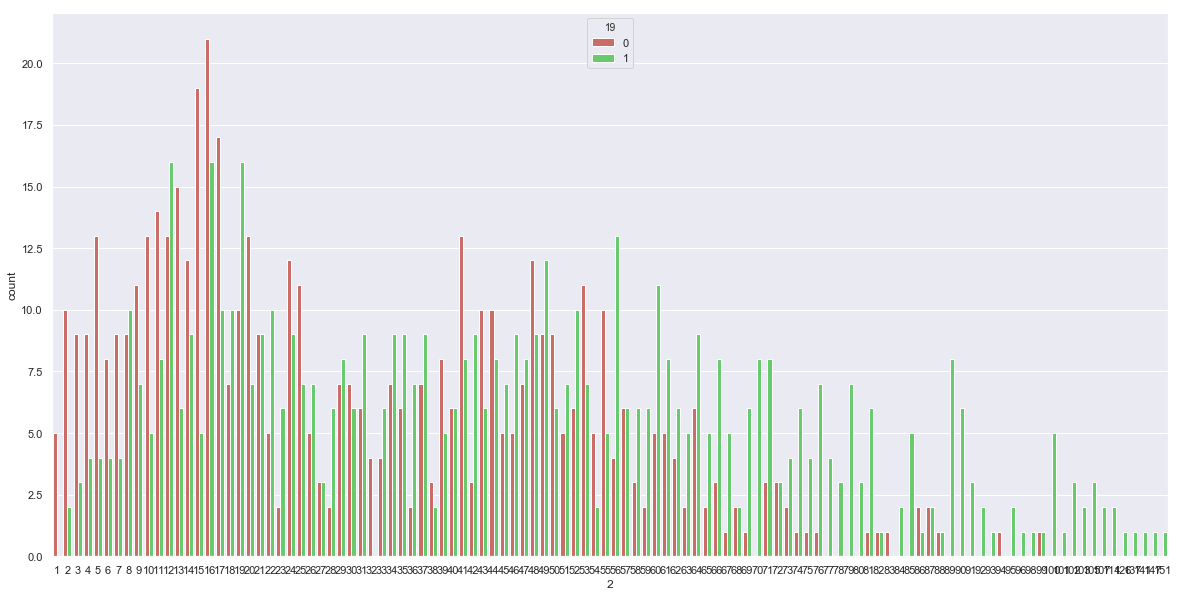

In [10]:
# Plot 3rd feature vs diabetes 
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x=2, hue=19, data=messidor_data)

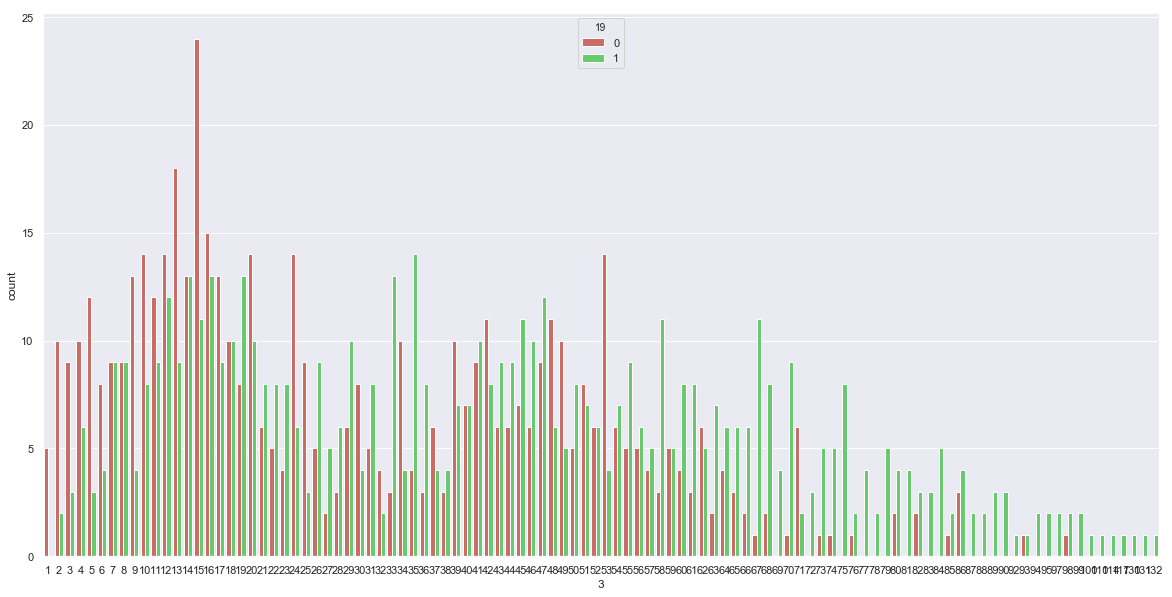

In [11]:
# Plot 4th feature vs diabetes
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x=3, hue=19, data=messidor_data)

In [14]:
#Plotting pairwise relationships.
gr = sns.PairGrid(messidor_data, height=5, hue=19)
gr = gr.map_diag(plt.hist)
gr = gr.map_offdiag(plt.scatter)
gr = gr.add_legend()

Dataset Lenght:  1151
Dataset Shape:  (1151, 20)
Dataset: 
   0   1   2   3   4   5   6   7       8       9       10     11     12  \
0   1   1  22  22  22  19  18  14  49.896  17.776   5.271  0.772  0.019   
1   1   1  24  24  22  18  16  13  57.710  23.800   3.325  0.234  0.004   
2   1   1  62  60  59  54  47  33  55.831  27.994  12.687  4.852  1.394   
3   1   1  55  53  53  50  43  31  40.467  18.446   9.119  3.079  0.840   
4   1   1  44  44  44  41  39  27  18.026   8.571   0.410  0.000  0.000   

      13     14     15     16     17  18  19  
0  0.007  0.004  0.004  0.487  0.100   1   0  
1  0.004  0.004  0.004  0.521  0.144   0   0  
2  0.373  0.042  0.008  0.531  0.129   0   1  
3  0.272  0.008  0.002  0.483  0.115   0   0  
4  0.000  0.000  0.000  0.476  0.124   0   1  
scaled data
[[ 0.07066653 -3.29214752  2.12975328  2.29255013  2.50107324  2.84538991
   2.60443331  2.29073335 -0.7954585  -0.82017687 -0.67003552 -0.46601456
  -0.22874212 -0.21268512 -0.23785096 -0.2192975

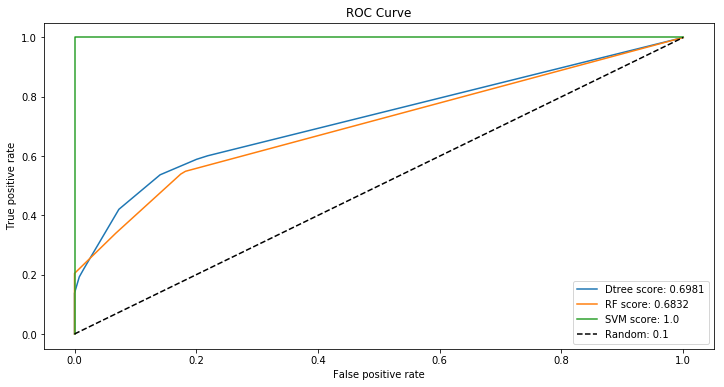

In [11]:
def importdata(): 
	messidor_data = pd.read_csv( 'messidor_features.arff.txt', sep= ',',header=None,comment='@') 
	
	# Printing the dataset shape 
	print ("Dataset Lenght: ", len(messidor_data)) 
	print ("Dataset Shape: ", messidor_data.shape) 
	
	# Printing the dataset obseravtions 
	print ("Dataset: ")
	print(messidor_data.head()) 
	return messidor_data
	 
#preprocess data
def preprocessing(messidor_data):
	pd.set_option('precision', 3)
    #messidor_data.describe()
	
	
		
# Function to split the dataset 
def splitdataset(messidor_data): 

	# Seperating the target variable 
	X = messidor_data.values[:, 0:19] 
	Y = messidor_data.values[:, 19] 

	# Spliting the dataset into train and test 
	X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, test_size = 0.3, random_state = 0)
	sc = StandardScaler()# just for scaled value
	X_train = sc.fit_transform(X_train)# just for scaled value
	X_test = sc.transform(X_test)# just for scaled value
	print("scaled data")
	print(X_train[0:5,:]) 
	
	return X, Y, X_train, X_test, y_train, y_test 
	
# Function to perform training with giniIndex. 
def Dtree_train_using_gini(X_train, X_test, y_train): 

	# Creating the classifier object 
	clf_gini = DecisionTreeClassifier(criterion = "gini", 
			random_state = 10,max_depth=3, min_samples_leaf=5) 

	# Performing training 
	clf_gini.fit(X_train, y_train) 
	return clf_gini 
	
# Function to perform training with entropy. 
def Dtree_train_using_entropy(X_train, X_test, y_train): 

	# Decision tree with entropy 
	clf_entropy = DecisionTreeClassifier( 
			criterion = "entropy", random_state = 10, 
			max_depth = 3, min_samples_leaf = 5) 

	# Performing training 
	clf_entropy.fit(X_train, y_train) 
	return clf_entropy 
# random forest function	
def Random_forest_training(X_train, X_test, y_train):
	
	clf_RandomForest = RandomForestClassifier(n_estimators=70, random_state=0)
	clf_RandomForest.fit(X_train, y_train)
	
	return clf_RandomForest
	
# SVM function to build model
def SVM_training(X_train, X_test, y_train):
	clf_SVM = svm.SVC(kernel='linear', gamma=1)
	clf_SVM.fit(X_train, y_train)
	
	return clf_SVM
	
# Function to make predictions 
def print_Dtree(X_train, X_test, y_train):
	clf = tree.DecisionTreeClassifier()
	clf = clf.fit(X_train,y_train)
	
	dot_data = StringIO()
	tree.export_graphviz(clf, out_file=dot_data)
	graph = pydot.graph_from_dot_data(dot_data.getvalue())
#	graph[0].write_pdf("Dtree.pdf")
            

def prediction(X_test, clf_object): 

	# Predicton on test data with created model after training i.e.(clf_object)  
	y_pred= clf_object.predict(X_test) 
	print("Predicted values:") 
	print(y_pred) 
	return y_pred 
	
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ") 
	print(confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : ") 
	print(accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ") 
	print(classification_report(y_test, y_pred))

def get_auc_scores(y_actual, method, method2):
	auc_score = roc_auc_score(y_actual, method)
	fpr_df, tpr_df, _ = roc_curve(y_actual, method2)
	return (auc_score, fpr_df, tpr_df)	 
	
def print_roc_curve(X_test,y_test,clf_gini,clf_entropy,clf_randomForest,clf_SVM):
	auc_clf_gini, fpr_clf_gini, tpr_clf_gini = get_auc_scores(y_test, clf_gini.predict(X_test), clf_gini.predict_proba(X_test)[:,1])
	auc_clf_entropy, fpr_clf_entropy, tpr_clf_entropy = get_auc_scores(y_test, clf_entropy.predict(X_test), clf_entropy.predict_proba(X_test)[:,1])
	auc_clf_randomForest, fpr_clf_randomForest, tpr_clf_randomForest = get_auc_scores(y_test, clf_randomForest.predict(X_test), clf_randomForest.predict_proba(X_test)[:,1])
	#auc_clf_SVM, fpr_clf_SVM, tpr_clf_SVM = get_auc_scores(y_test, clf_SVM.predict(X_test), clf_SVM.predict_proba(X_test)[:,1])
	plt.figure(figsize = (12,6), linewidth= 1)
	plt.plot(fpr_clf_gini, tpr_clf_gini, label = 'Dtree score: ' + str(round(auc_clf_gini, 5)))
	plt.plot(fpr_clf_entropy, tpr_clf_entropy, label = 'RF score: ' + str(round(auc_clf_entropy, 5)))
	plt.plot(fpr_clf_randomForest, tpr_clf_randomForest, label = 'SVM score: ' + str(round(auc_clf_randomForest, 5)))
	#plt.plot(fpr_clf_SVM, tpr_clf_SVM, label = 'SVM score: ' + str(round(auc_clf_SVM, 5)))
	plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.1')
	plt.xlabel('False positive rate')
	plt.ylabel('True positive rate')
	plt.title('ROC Curve')
	plt.legend(loc='best')
	plt.show()
	
		
# Driver code 
def main(): 
	
	# Building Phase 
	data = importdata()
	#preprocessing(data)
	
	preprocess_data = data 
	
	X, Y, X_train, X_test, y_train, y_test = splitdataset(preprocess_data)
	 
	clf_gini = Dtree_train_using_gini(X_train, X_test, y_train)
	 
	clf_entropy = Dtree_train_using_entropy(X_train, X_test, y_train) 
	
	# Operational Phase 
	#print_Dtree(X_train, X_test, y_train)# for print Dtree image
	
	print("***************************Decision tree Results Using Gini Index***************************") 
	
	# Prediction using gini 
	y_pred_gini = prediction(X_test, clf_gini) 
	cal_accuracy(y_test, y_pred_gini) 
	#--------
	
	print("***************************Dtree Results Using Entropy***************************") 
	# Prediction using entropy 
	y_pred_entropy = prediction(X_test, clf_entropy) 
	cal_accuracy(y_test, y_pred_entropy) 
	
	print("***************************Random forest result after testing***************************")
	clf_randomForest = Random_forest_training(X_train, X_test, y_train)
	
	y_pred_randomForest = prediction(X_test,clf_randomForest)
	
	cal_accuracy(y_test, y_pred_randomForest)
	print("***************************SVM result after testing***************************")
	clf_SVM=SVM_training(X_train, X_test, y_train)
	y_pred_SVM = prediction(X_test,clf_SVM)
	cal_accuracy(y_test,y_pred_SVM)
	print_roc_curve(X_train,y_train,clf_gini,clf_entropy,clf_randomForest,clf_SVM)
# Calling main function 
if __name__=="__main__": 
	main() 
